<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Price_NSEI%26VIXS%26P500_Analysis_mathclasstutor_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price NSEI Analysis with Python

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 12.0 MB/s 
     |████████████████████████████████| 63 kB 255 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [5]:
nsei = yf.download('^NSEI',
 start='2020-01-01',
 end='2022-01-14',
 progress=False)

In [4]:
nsei.tail(9)

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2021-12-31  17244.500000  17400.800781  ...  17354.050781  167000
2022-01-03  17387.150391  17646.650391  ...  17625.699219  200500
2022-01-04  17681.400391  17827.599609  ...  17805.250000  247400
2022-01-05  17820.099609  17944.699219  ...  17925.250000  251500
2022-01-06  17768.500000  17797.949219  ...  17745.900391  236500
2022-01-07  17797.599609  17905.000000  ...  17812.699219  239300
2022-01-10  17913.300781  18017.449219  ...  18003.300781  232400
2022-01-11  17997.750000  18081.250000  ...  18055.750000  220200
2022-01-12  18170.400391  18227.949219  ...  18212.349609  245000

[9 rows x 6 columns]

In [ ]:
nsei.head()

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2020-01-01  12202.150391  12222.200195  ...  12182.500000  304100
2020-01-02  12198.549805  12289.900391  ...  12282.200195  407700
2020-01-03  12261.099609  12265.599609  ...  12226.650391  428800
2020-01-06  12170.599609  12179.099609  ...  11993.049805  396500
2020-01-07  12079.099609  12152.150391  ...  12052.950195  447800

[5 rows x 6 columns]

In [ ]:
import matplotlib.pyplot as plt

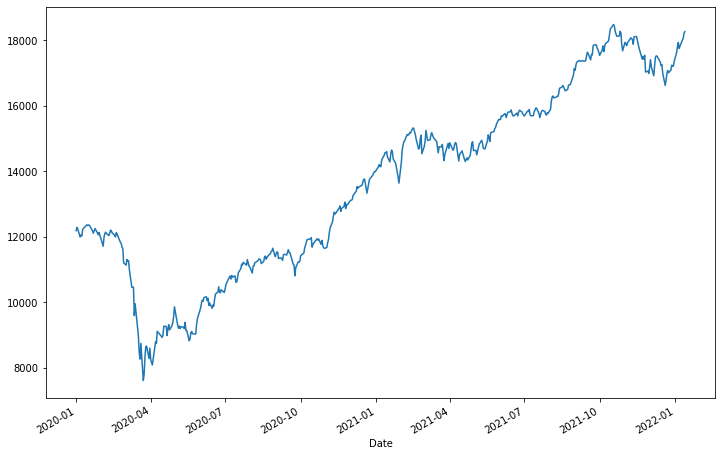

In [6]:
nsei['Close'].plot(figsize=(12,8))

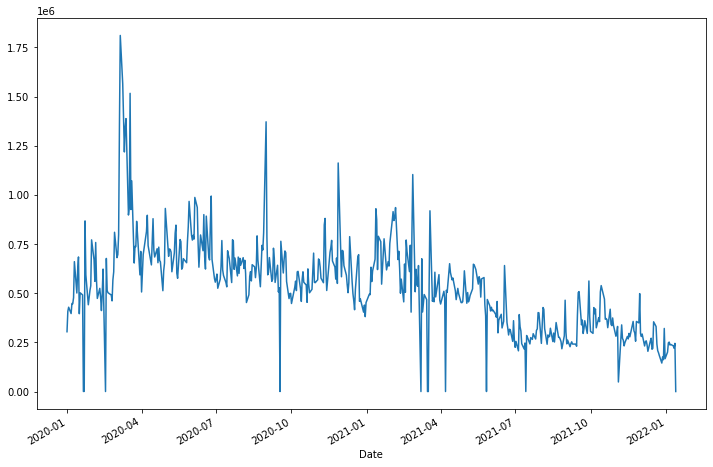

In [7]:
nsei['Volume'].plot(figsize=(12,8))

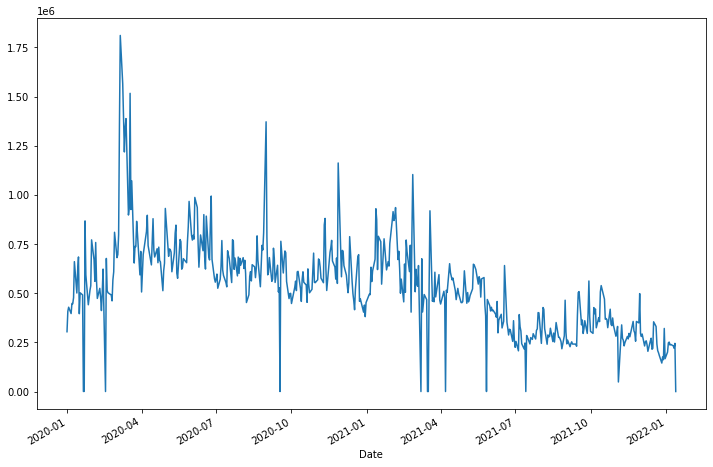

In [8]:
nsei['Volume'].plot(figsize=(12,8))

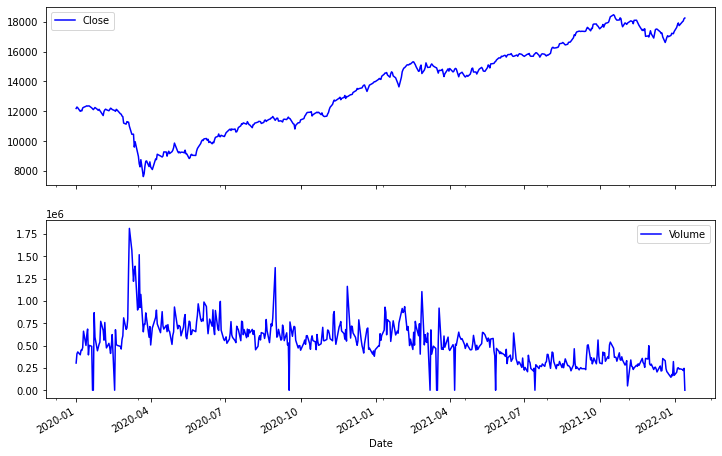

In [9]:
nsei[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8));

In [10]:
nsei.describe()

Open          High  ...     Adj Close        Volume
count    506.000000    506.000000  ...    506.000000  5.060000e+02
mean   13669.710369  13747.577940  ...  13656.742477  5.299038e+05
std     2824.472048   2812.678384  ...   2825.026191  2.368592e+05
min     7735.149902   8036.950195  ...   7610.250000  0.000000e+00
25%    11367.975098  11429.699707  ...  11339.149658  3.563250e+05
50%    14028.025391  14181.774902  ...  14057.425293  5.265000e+05
75%    15818.137207  15875.712158  ...  15812.224609  6.684250e+05
max    18602.349609  18604.449219  ...  18477.050781  1.811000e+06

[8 rows x 6 columns]

In [43]:
nsei['simple_rtn'] = nsei.Close.pct_change()

In [12]:
nsei['log_rtn'] = np.log(nsei.Close/nsei.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fc7a71fd0>],
      dtype=object)

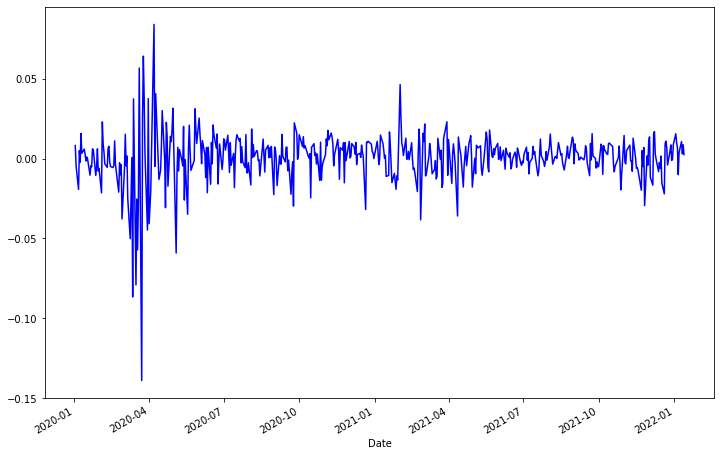

In [13]:
nsei['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [14]:
nsei['log_rtn'].tail(12)

Date
2021-12-29   -0.001141
2021-12-30   -0.000561
2021-12-31    0.008687
2022-01-03    0.015532
2022-01-04    0.010135
2022-01-05    0.006717
2022-01-06   -0.010056
2022-01-07    0.003757
2022-01-10    0.010643
2022-01-11    0.002909
2022-01-12    0.008636
2022-01-13    0.002493
Name: log_rtn, dtype: float64

In [15]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [ ]:
init_notebook_mode()

In [34]:
df_rolling = nsei[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [35]:
df_rolling.columns = df_rolling.columns.droplevel()

In [36]:
df_outliers = nsei.join(df_rolling)

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [48]:
df = yf.download(['^NSEI', '^VIX'],
start='1985-01-01',
end='2022-01-14',
progress=False)

In [49]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^NSEI': 'nsei', '^VIX': 'vix'})

In [50]:
df.tail()

nsei        vix
Date                               
2022-01-07  17812.699219  18.760000
2022-01-10  18003.300781  19.400000
2022-01-11  18055.750000  18.410000
2022-01-12  18212.349609  17.620001
2022-01-13  18257.800781  20.309999

In [51]:
df['log_rtn'] = np.log(df.nsei / df.nsei.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [52]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'NSEI log returns'),
 Text(0.5, 1.0, 'NSEI vs. VIX ($\\rho$ = -0.21)')]

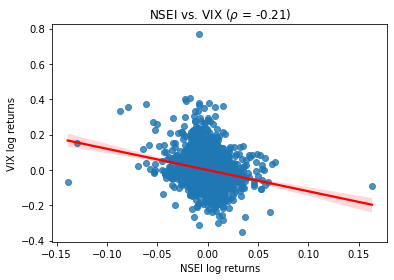

In [53]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'NSEI vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='NSEI log returns')

In [54]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

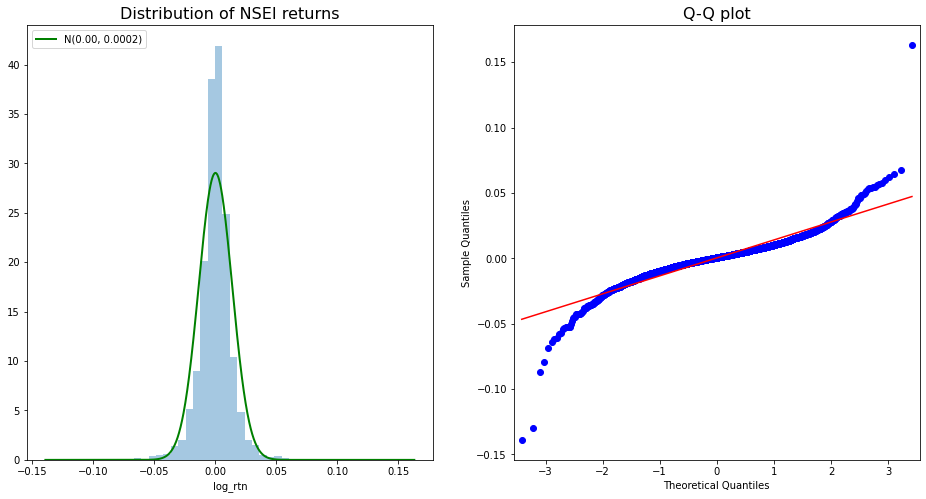

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of NSEI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [56]:
df['log_rtn'].tail()

Date
2022-01-07    0.003757
2022-01-10    0.010643
2022-01-11    0.002909
2022-01-12    0.008636
2022-01-13    0.002493
Name: log_rtn, dtype: float64

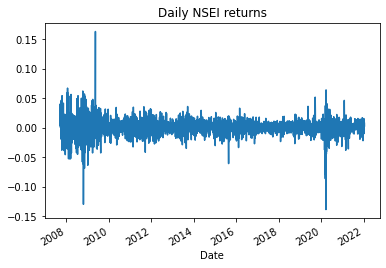

In [57]:
df.log_rtn.plot(title='Daily NSEI returns')

In [58]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

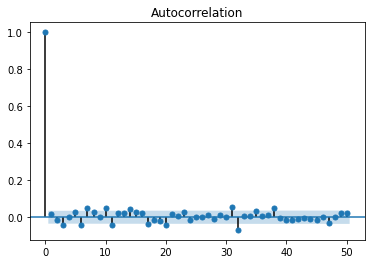

In [59]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

In [60]:
import matplotlib.pyplot as plt


[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

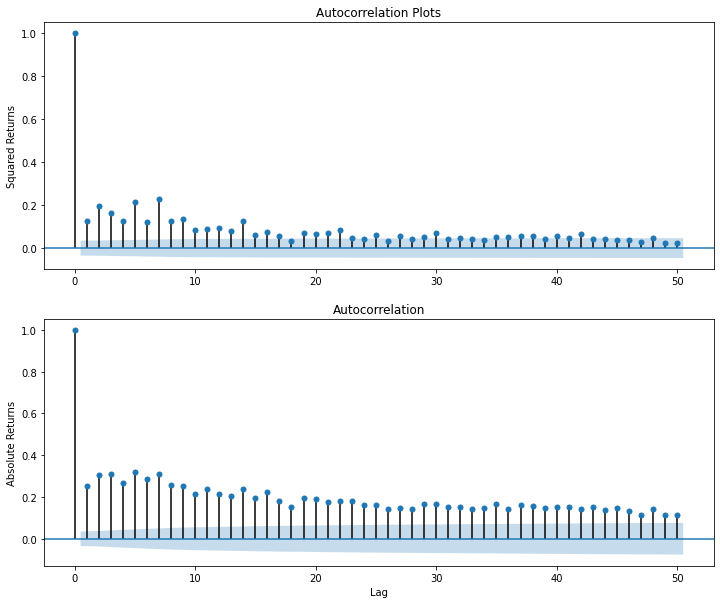

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [62]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

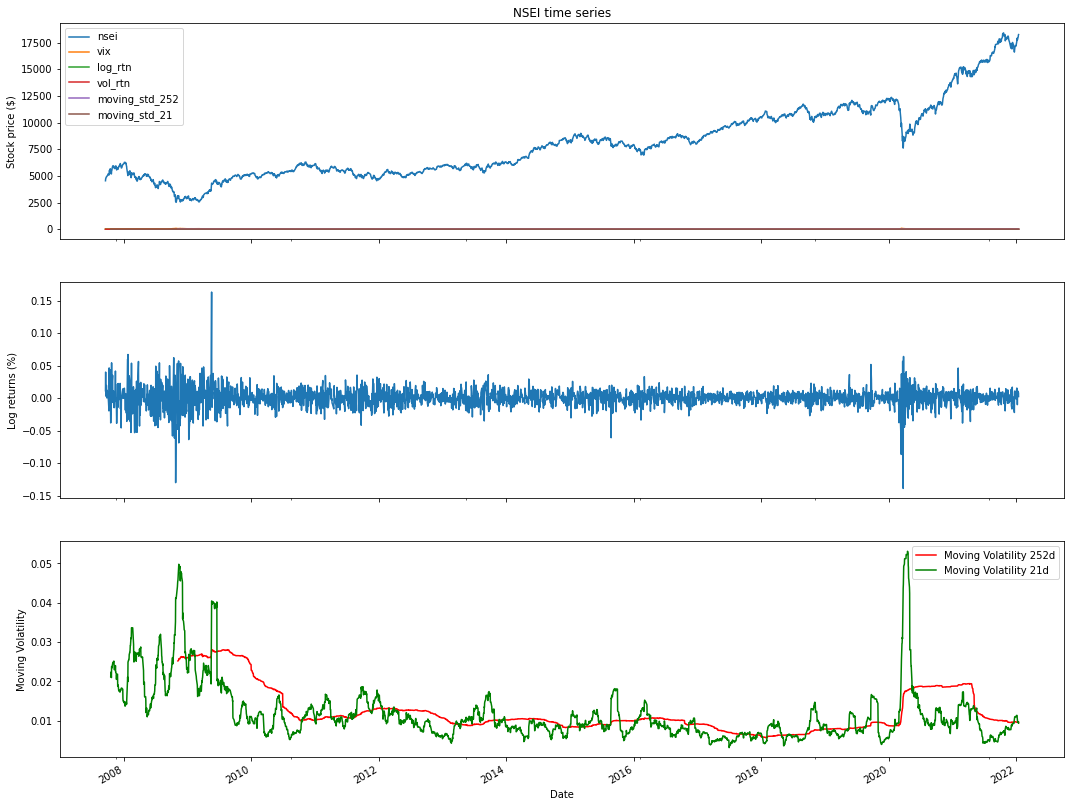

In [63]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='NSEI time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

**Price S&P500 Analysis with Python**

In [64]:
df = yf.download(['^GSPC', '^VIX'],
start='1985-01-01',
end='2022-01-13',
progress=False)

In [65]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [66]:
df.tail()

sp500        vix
Date                              
2022-01-06  4696.049805  19.610001
2022-01-07  4677.029785  18.760000
2022-01-10  4670.290039  19.400000
2022-01-11  4713.069824  18.410000
2022-01-12  4726.350098  17.620001

In [67]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [68]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)')]

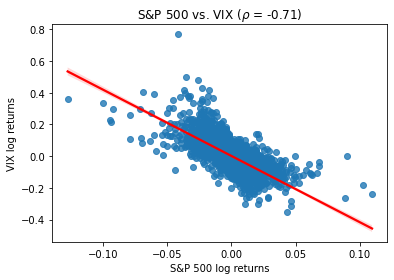

In [69]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='S&P 500 log returns')

In [70]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

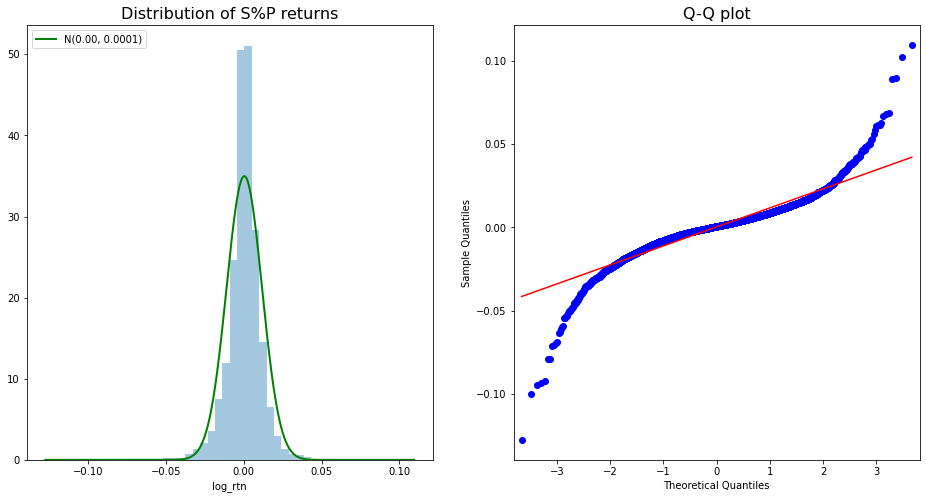

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S%P returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [72]:
df['log_rtn'].tail()

Date
2022-01-06   -0.000964
2022-01-07   -0.004058
2022-01-10   -0.001442
2022-01-11    0.009118
2022-01-12    0.002814
Name: log_rtn, dtype: float64

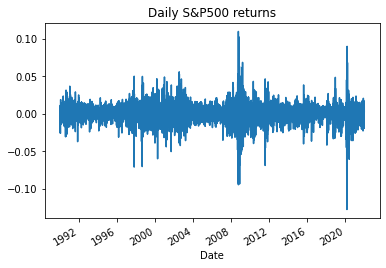

In [73]:
df.log_rtn.plot(title='Daily S&P500 returns')

In [74]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

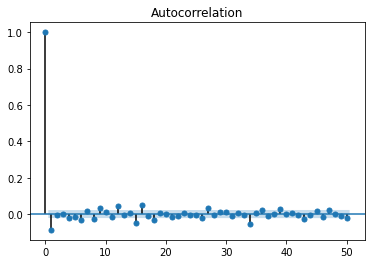

In [75]:

acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

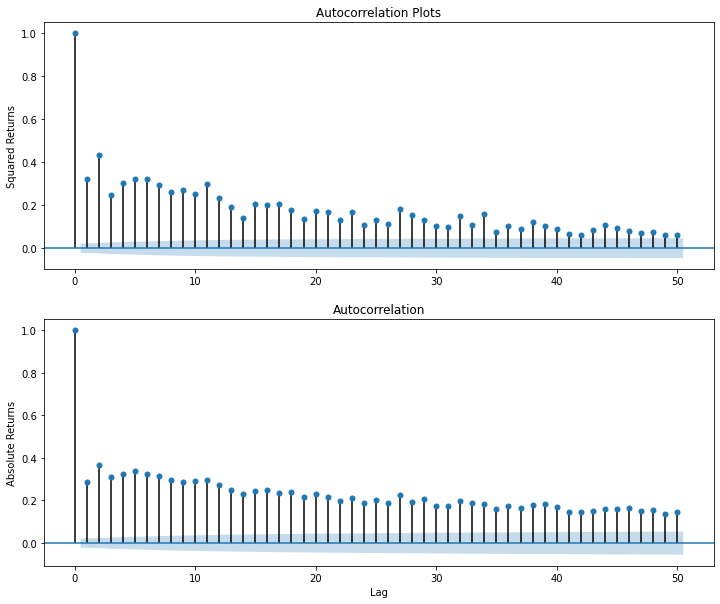

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [77]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

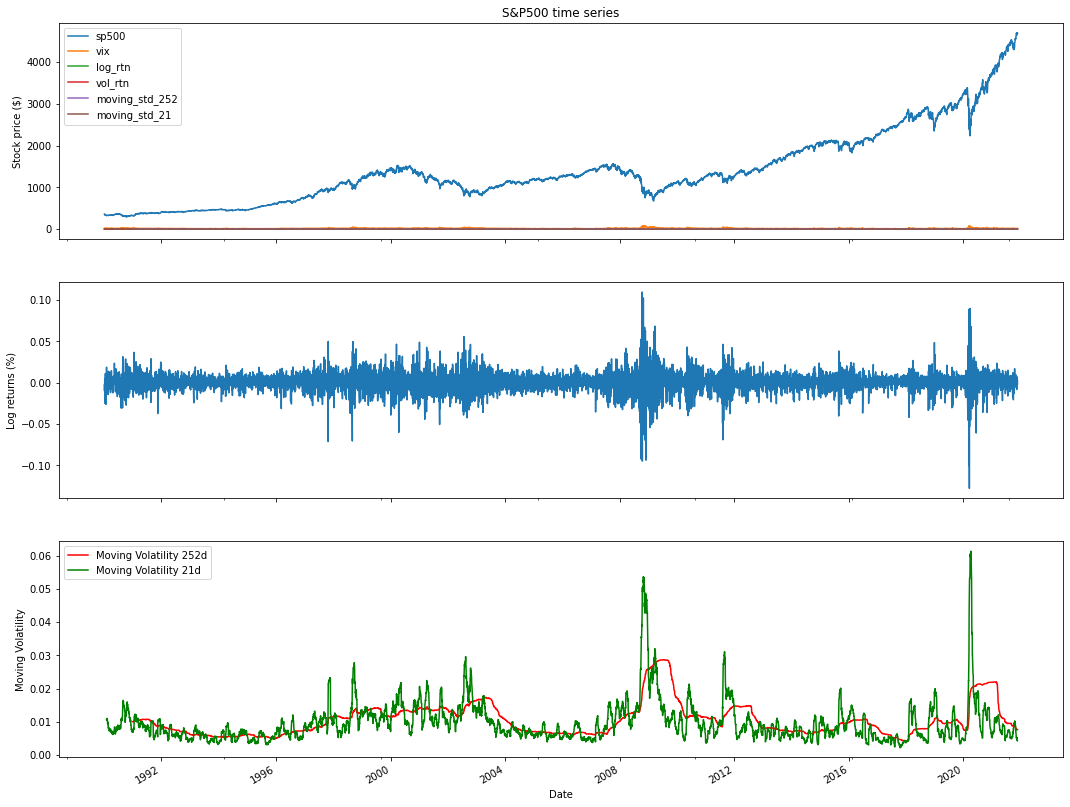

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()